## Extract Features from Image

In [4]:
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

In [5]:
# load the model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summary
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
features = {}
directory = 'image data/'
for image in os.listdir(directory):
    image_path = directory+image
    
    # load the image
    img = load_img(image_path, target_size=(224, 224))
    # convert pixel to numpy array
    img = img_to_array(img)
    # reshape the image for the model
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    # preprocess the image
    img = preprocess_input(img)
    # extract features
    feature = model.predict(img, verbose=0)
    # store feature
    features[image_path] = feature

In [13]:
# feature.tolist()
features['image data/1.jpg']
# store the dictionary using pickle

array([[0.        , 0.        , 0.85335493, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

## Extract Features from Audio

In [16]:
# !pip install librosa

In [24]:
import librosa
import librosa.display
import IPython.display as ipd
import os
import numpy as np

In [20]:
for file in os.listdir('audio data/'):
    print(file)

OAF_back_fear.wav
OAF_back_happy.wav
OAF_back_ps.wav
OAF_back_sad.wav


In [21]:
ipd.Audio('audio data/OAF_back_happy.wav')

In [25]:
def feature_extraction(file_path):
    # load the audio file
    x, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    # extract features from the audio
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=50).T, axis=0)
    
    return mfcc

In [26]:
features = {}
directory = 'audio data/'
for audio in os.listdir(directory):
    audio_path = directory+audio
    features[audio_path] = feature_extraction(audio_path)

In [27]:
audio_path

'audio data/OAF_back_sad.wav'

In [29]:
features[audio_path], len(features[audio_path])

(array([-5.45112976e+02,  8.45765152e+01,  1.97867851e+01,  1.57587433e+01,
         1.19505682e+01,  1.99414787e+01, -1.66443958e+01, -5.83508873e+00,
        -1.49142656e+01,  7.49133253e+00, -1.26599941e+01,  1.03757305e+01,
        -8.21155357e+00,  1.39499397e+01,  3.85002089e+00, -1.90467656e+00,
        -9.66936052e-01,  1.13953471e+00,  3.03179502e+00, -3.28641486e+00,
         2.70385575e+00,  2.46525741e+00, -4.16511345e+00,  8.95555496e-01,
        -7.91851473e+00, -3.65912080e-01,  1.03952038e+00,  6.57844543e-03,
        -1.79344571e+00,  8.81427479e+00,  6.59980965e+00,  1.05787868e+01,
         1.09505825e+01,  9.41102600e+00,  6.45796394e+00,  5.72548151e+00,
         9.25910664e+00,  7.19050741e+00,  1.38176470e+01,  1.14543543e+01,
         9.49003029e+00,  5.20508289e+00,  4.15053225e+00,  5.35622215e+00,
         5.44810677e+00,  3.08560395e+00,  1.56520414e+00,  9.63827789e-01,
         3.19523668e+00,  7.85421312e-01], dtype=float32),
 50)

## Data Augmentation for Image

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
# reshape the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# change the type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

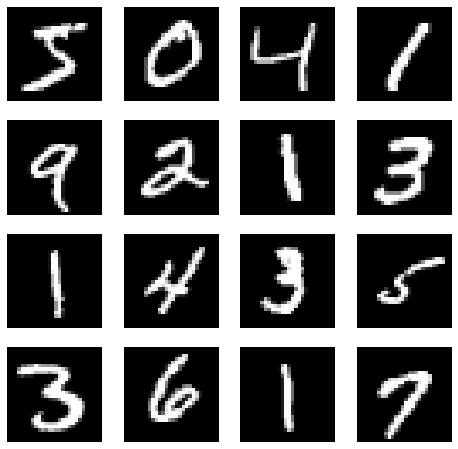

In [9]:
data_generator = ImageDataGenerator()
# configure batch for the images
for X_batch, y_batch in data_generator.flow(X_train, y_train, batch_size=16, shuffle=False):
    # create grid of 4x4 images
    fig, ax = plt.subplots(4, 4, figsize=(8, 8))
    for i in range(4):
        for j in range(4):
            ax[i][j].axis('off')
            ax[i][j].imshow(X_batch[i*4 + j].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

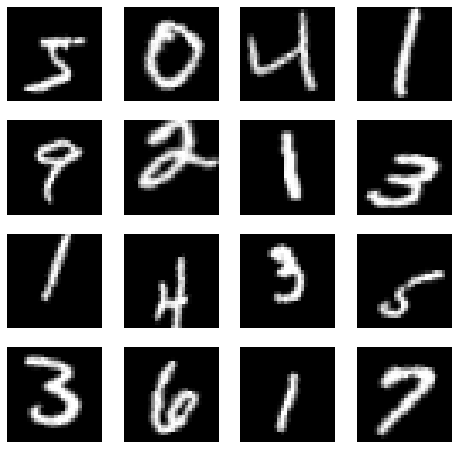

In [10]:
# data augmentation
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    height_shift_range=0.2
)
# configure batch for the images
for X_batch, y_batch in data_generator.flow(X_train, y_train, batch_size=16, shuffle=False):
    # create grid of 4x4 images
    fig, ax = plt.subplots(4, 4, figsize=(8, 8))
    for i in range(4):
        for j in range(4):
            ax[i][j].axis('off')
            ax[i][j].imshow(X_batch[i*4 + j].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

## Transfer Learning using Pretrained Model

In [36]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [38]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [39]:
# reshape the data
X_train = X_train.reshape((X_train.shape[0], 28, 28))
X_test = X_test.reshape((X_test.shape[0], 28, 28))
# change the type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# convert data to 3 channels
X_train = np.stack((X_train,)*3, axis=-1)
X_test = np.stack((X_test,)*3, axis=-1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [40]:
X_train.shape, X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [41]:
# data augmentation with generator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow(X_train, y_train, batch_size=512, shuffle=True)

val_iterator = val_generator.flow(X_test, y_test, batch_size=512, shuffle=False)

In [42]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
model = Sequential()
# add the pretrained model
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
# add fully connected layer with output
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# set resnet layers not trainable
model.layers[0].trainable=False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [44]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Learning Rate Scheduler

In [45]:
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf

def scheduler(epoch, lr):
    if epoch <= 3:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [46]:
lr = 0.01
for i in range(10):
    lr = scheduler(i, lr)
    print(i, lr)

0 0.01
1 0.01
2 0.01
3 0.01
4 tf.Tensor(0.009048373, shape=(), dtype=float32)
5 tf.Tensor(0.008187306, shape=(), dtype=float32)
6 tf.Tensor(0.0074081807, shape=(), dtype=float32)
7 tf.Tensor(0.006703199, shape=(), dtype=float32)
8 tf.Tensor(0.006065305, shape=(), dtype=float32)
9 tf.Tensor(0.0054881144, shape=(), dtype=float32)


In [47]:
callback = LearningRateScheduler(scheduler)

In [48]:
# train the model
model.fit(train_iterator, epochs=10, validation_data=val_iterator, callbacks=callback)

Epoch 1/10
118/118 [==============================] - 28s 212ms/step - loss: 1.8649 - accuracy: 0.3935 - val_loss: 0.8353 - val_accuracy: 0.7686
Epoch 2/10
118/118 [==============================] - 24s 198ms/step - loss: 1.0418 - accuracy: 0.6792 - val_loss: 0.6458 - val_accuracy: 0.8067
Epoch 3/10
118/118 [==============================] - 23s 196ms/step - loss: 0.8402 - accuracy: 0.7442 - val_loss: 0.5829 - val_accuracy: 0.8213
Epoch 4/10
118/118 [==============================] - 23s 197ms/step - loss: 0.7247 - accuracy: 0.7757 - val_loss: 0.5291 - val_accuracy: 0.8297
Epoch 5/10
118/118 [==============================] - 23s 194ms/step - loss: 0.6669 - accuracy: 0.7907 - val_loss: 0.4918 - val_accuracy: 0.8450
Epoch 6/10
118/118 [==============================] - 23s 197ms/step - loss: 0.6155 - accuracy: 0.8083 - val_loss: 0.4922 - val_accuracy: 0.8416
Epoch 7/10
118/118 [==============================] - 28s 232ms/step - loss: 0.5778 - accuracy: 0.8202 - val_loss: 0.4703 - val_ac

## Early Stopping & Checkpoint

In [13]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

In [2]:
# load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
# define the model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [9]:
# # saving the best model
# model_checkpoint = ModelCheckpoint("checkpoint.model.keras",
#                                   verbose=1,
#                                    save_best_only=True,
#                                    monitor='val_loss'
#                                   )

In [15]:
# create checkpoint folder
checkpoint_path = 'model_checkpoint/cp-{epoch:03d}.keras'
checkpoint_dir = os.path.dirname(checkpoint_path)
os.makedirs(checkpoint_dir, exist_ok=True)

model_checkpoint = ModelCheckpoint(checkpoint_path,
                                   verbose=1,
                                   save_freq='epoch',
                                  )

In [16]:
# train the model
# history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), callbacks=[early_stopping, model_checkpoint])
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/30
1478/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9948 - loss: 0.0176
Epoch 1: saving model to model_checkpoint/cp-001.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9948 - loss: 0.0176 - val_accuracy: 0.9956 - val_loss: 0.0153
Epoch 2/30
1484/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9962 - loss: 0.0129
Epoch 2: saving model to model_checkpoint/cp-002.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9962 - loss: 0.0129 - val_accuracy: 0.9906 - val_loss: 0.0259
Epoch 3/30
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.0113
Epoch 3: saving model to model_checkpoint/cp-003.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9973 - loss: 0.0113 - val_accuracy: 0.9910 - val_loss: 0.0276
Epoch 4/30
1479/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9974 - loss: 0.0098
Epoch 4: saving model to model_checkpoint/cp-004.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9974 - loss: 0

In [17]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Best Loss:', loss, "Best Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9747 - loss: 0.0986
Best Loss: 0.08530430495738983 Best Accuracy: 0.9783999919891357
